# Feature Selection and Model Training


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler


In [2]:
# read preprocessed dataset
df = pd.read_csv(r"C:\Nishanthi\Hope AI\Projects\Depression Detection\Ordered_Formate\2.Data- Preprocessing\Preprocessed_data.csv")
df.shape

(73925, 19)

# Feature Selection

C:\Users\ANISH\AppData\Local\Temp\ipykernel_25748\558798909.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')


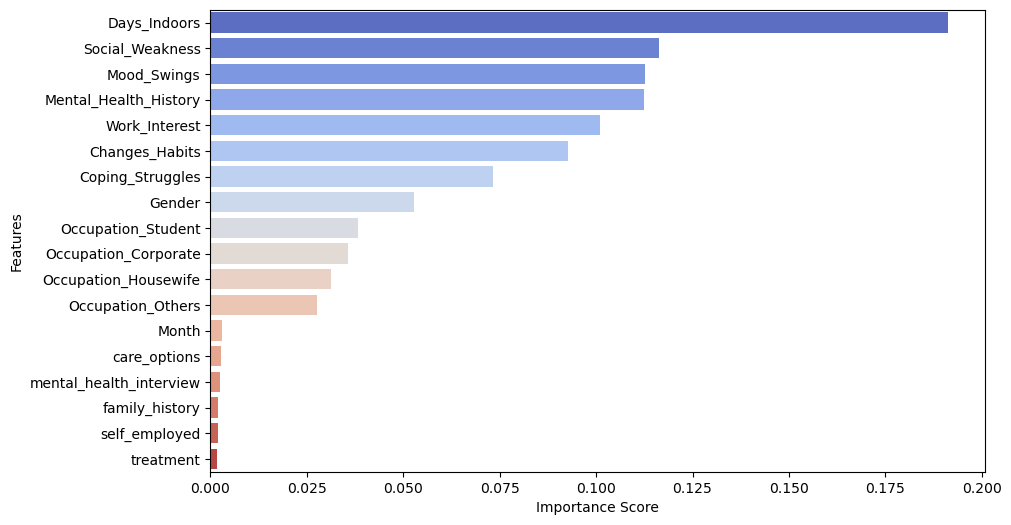

In [3]:

X = df[['Gender', 'self_employed', 'family_history', 'treatment','Days_Indoors', 'Changes_Habits','Mental_Health_History', 'Mood_Swings', 'Coping_Struggles',
       'Work_Interest', 'Social_Weakness', 'mental_health_interview','care_options', 'Month', 'Occupation_Corporate', 'Occupation_Housewife','Occupation_Others', 'Occupation_Student']]  # Features
y = df['Growing_Stress']  # Target

fselector = RandomForestClassifier()
fselector.fit(X, y)

# Get Feature Importances
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': fselector.feature_importances_}).sort_values(by='Importance', ascending=False)  # Sort by importance

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Split Train and Test data

In [4]:
# Define features and target
X = df[['Social_Weakness','Changes_Habits','Days_Indoors','Mental_Health_History','Gender','Mood_Swings',
         'Occupation_Student','Occupation_Corporate','Occupation_Housewife','Occupation_Others','Work_Interest']]  # Features
y = df['Growing_Stress']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

# Model Creation


# Logistic Regression  Model 

In [5]:

log_model = RidgeClassifier(alpha=1)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.6480579641287564


# SVM Model

In [6]:

sc = StandardScaler()
Xtrain_scaled = sc.fit_transform(X_train)
Xtest_scaled = sc.fit_transform(X_test)

model = SVC(kernel='rbf')
model.fit(Xtrain_scaled, y_train)
y_pred = model.predict(Xtest_scaled)

print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.9823879823879824


# K Neighbors Model 

In [7]:
model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [ 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': [ 'euclidean', 'manhattan'],
}


# Grid Search with 5-fold CV
grid = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro', verbose=1)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print("Best Params:", grid.best_params_)
print("F1 score:", f1_score(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
F1 score: 0.9853747714808044


# Naive Bayes Model

In [8]:
# Naive Bayes
model = GaussianNB(var_smoothing=1e-09)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("F1 score:",f1_score(y_test, y_pred))

F1 score: 0.6019585967522003


# Decision Tree Model

In [9]:
# Decision Tree

model = DecisionTreeClassifier(criterion='gini', splitter='best', 
                               max_depth=15, min_samples_split=2, 
                               min_samples_leaf=2, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("F1 score:",f1_score(y_test, y_pred))

F1 score: 0.9927102317104921


# Evaluating the model

# Perform Cross-Validation 

In [10]:

from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = cross_val_score(model, X, y, cv=skf, scoring='f1_macro')
print("Cross Validation Result for Best model :", f1_scores)

Cross Validation Result for Best model : [0.99003812 0.99031089 0.99207068 0.98949709 0.98692666]


# Classification Report

In [11]:
print("Classification report")
print(classification_report(y_test, y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3554
           1       0.99      0.99      0.99      3839

    accuracy                           0.99      7393
   macro avg       0.99      0.99      0.99      7393
weighted avg       0.99      0.99      0.99      7393



# Confusion Matrix

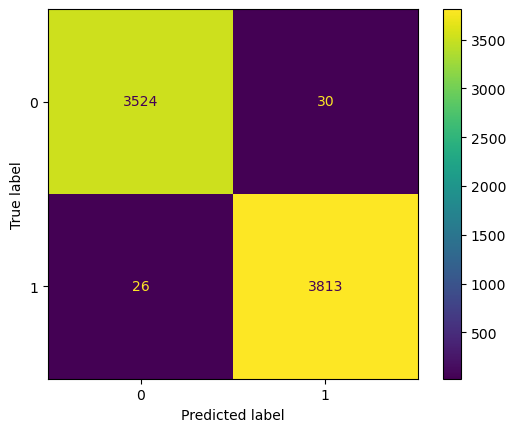

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
